<a href="https://colab.research.google.com/github/zkhodakarami/prescient-fork/blob/master/prescient_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRESCIENT

PRESCIENT (Potential eneRgy undeRlying Single-Cell gradIENTs) is a tool for simulating cellular differentiation trajectories with arbitrary cell state intializations. PRESCIENT frames differentiation as a diffusion process given by a stochastic ODE with a drift parameter given by a generative neural network. PRESCIENT models can simulate cellular differentiation trajectories for out-of-sample (i.e. not seen during training) cells, enabling robust fate prediction and perturbational analysis. 

More information about PRESCIENT as well as detailed documentation of its CLI can be found at [https://cgs.csail.mit.edu/prescient/](https://cgs.csail.mit.edu/prescient/index). The source code for the project is available on [github](https://github.com/gifford-lab/prescient). Analyses reproducing results from the paper can be found in a separate [repo](https://github.com/gifford-lab/prescient-analysis/).

This Google Colab notebook provides a free demo of how PRESCIENT can be run with GPU acceleration. PRESCIENT is also available via PyPI for installation on a local workstation, compute server, or other cloud services such as [Google Cloud](https://cloud.google.com/ai-platform/notebooks/docs/create-new) or [AWS](https://docs.aws.amazon.com/dlami/latest/devguide/setup-jupyter.html).

This notebook demonstrates:

*   How to preprocess time series scRNA-seq for input to PRESCIENT
*   How to train a model
*   How to simulate/perturb the model
*   How to interact with PRESCIENT data and trained model objects

Users can refer to the analysis [repo](https://github.com/gifford-lab/prescient-analysis/) for more in-depth types of analyses that can be done. 


## Google Colab

Google Colab is a free cloud-based service that combines the interactive execution environment of Jupyter Notebooks with cloud compute. A good introduction to Google Colab can be found [here](https://colab.research.google.com/notebooks/welcome.ipynb).

Google Colab notebooks can be used with GPU acceleration. If you haven't already, make a copy of the notebook to your Drive by going to File->Save A Copy In Drive so that you can edit the notebook. To enable GPU acceleration, go to Runtime->Change runtime type and select GPU under Hardware accelerator. In the top right corner, there should also be a green tick indicating you are connected to a hosted runtime. If not, click to reconnect. More information is available [here](https://colab.research.google.com/notebooks/gpu.ipynb)

Then, if correctly set up, `nvidia-smi` should return information about the available GPU. 

In [ ]:
!nvidia-smi

Fri Feb 19 18:17:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Downloading demo data

In this demo, we will be using scRNA-seq data from a time course experiment of progenitor cells differentiating toward pancreatic beta cells during stage 5 _in vitro_ differentiation by [Veres et al. 2019](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6903417/). 

First, download the training data using `wget`. 

> Tip: Prefixing with `!` allows us to invoke shell commands. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!python /content/drive/MyDrive/priscient/prescient/train/util.py

In [3]:
!pip install geomloss


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for geomloss: filename=geomloss-0.2.5-py3-none-any.whl size=32069 sha256=0ecdb9129d29becd62c027e43d50f2335b9a5b7198d082fca6a676007bdb4555
  Stored in directory: /root/.cache/pip/wheels/40/12/eb/2045cd22eaf9aa12e328e03ce2bf0304b70f49510c6ad0ce7b
Successfully built geomloss


In [4]:
!python /content/drive/MyDrive/priscient/prescient/train/model.py

In [5]:
!python /content/drive/MyDrive/priscient/prescient/train/run.py

In [6]:
!python /content/drive/MyDrive/priscient/prescient/train/__init__.py

In [7]:
!python /content/drive/MyDrive/priscient/prescient/simulate/sim.py

In [12]:
import sys
sys.path.insert(0, '/content/drive/MyDrive/priscient/prescient')
import train

In [13]:
!python /content/drive/MyDrive/priscient/prescient/commands/train_model.py

Traceback (most recent call last):
  File "/content/drive/MyDrive/priscient/prescient/commands/train_model.py", line 154, in <module>
    main()
TypeError: main() missing 1 required positional argument: 'args'


In [15]:
!pip install pyreadr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 363 kB 12.9 MB/s 


In [19]:
!pip install scanpy
!pip install anndata
!pip install umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 14.6 MB/s 
     |████████████████████████████████| 88 kB 8.6 MB/s 
     |████████████████████████████████| 11.2 MB 55.2 MB/s 
     |████████████████████████████████| 965 kB 61.3 MB/s 
     |████████████████████████████████| 1.1 MB 59.1 MB/s 
     |████████████████████████████████| 63 kB 2.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=e3b5116e0ab4918c6524ae731cf24c73650445d6d6c21bea2cd3f18264bd4634
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=7bcb76ede2d3410d44a94b211ea96a7c6552f0d2d6d9fcc825cfca413d009f94
  Stored in directory: /root/.cache/pip/wheels/19/bc/eb/974072a56a7082a302f8b4be1ad6d21bf5019235c2eff65928
  Created wheel for sess

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
!pip install annoy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 647 kB 14.1 MB/s 
  Created wheel for annoy: filename=annoy-1.17.1-cp37-cp37m-linux_x86_64.whl size=397044 sha256=fd7922aa99578a70ca9140eeaebbbbdf9b6d9974c5cf341baffe732435c874de
  Stored in directory: /root/.cache/pip/wheels/81/94/bf/92cb0e4fef8770fe9c6df0ba588fca30ab7c306b6048ae8a54
Successfully built annoy


In [22]:
!python /content/drive/MyDrive/priscient/prescient/commands/process_data.py

Traceback (most recent call last):
  File "/content/drive/MyDrive/priscient/prescient/commands/process_data.py", line 133, in <module>
    main()
TypeError: main() missing 1 required positional argument: 'args'


In [ ]:
!wget -O Veres2019.zip https://www.dropbox.com/sh/mz94yu0yjgvcp0i/AACAlnUQcr5BQBntJtHQSrkda?dl=1

--2021-02-19 18:17:44--  https://www.dropbox.com/sh/mz94yu0yjgvcp0i/AACAlnUQcr5BQBntJtHQSrkda?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/dl/mz94yu0yjgvcp0i/AACAlnUQcr5BQBntJtHQSrkda [following]
--2021-02-19 18:17:44--  https://www.dropbox.com/sh/dl/mz94yu0yjgvcp0i/AACAlnUQcr5BQBntJtHQSrkda
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc758ce906943997b1666495df73.dl.dropboxusercontent.com/zip_download_get/AsoeA9Jijw_DKsHMMhisTpo8MJPJdtBokqpeaeBjdHfvWdiJbi3JA3FMYorm6uHCZ7XXu6Sr1BkF_bbjJE5bnnFlskTkjrqQOHWqZMErIeDGvw?dl=1 [following]
--2021-02-19 18:17:45--  https://uc758ce906943997b1666495df73.dl.dropboxusercontent.com/zip_download_get/AsoeA9Jijw_DKsHMMhisTpo8MJPJdtBokqpeaeBjdHfvWdiJbi3JA3FMYorm6uHCZ7XXu6Sr1BkF_b

And unzip the folder

In [ ]:
!unzip Veres2019.zip -d Veres2019

Archive:  Veres2019.zip
mapname:  conversion of  failed
 extracting: Veres2019/50_20_10.txt  
 extracting: Veres2019/50_20_10.ann  
 extracting: Veres2019/fate_train.pt  
 extracting: Veres2019/Stage_5.Seurat.csv  
 extracting: Veres2019/Stage_5.Seurat.rds  
 extracting: Veres2019/hs_death_msigdb_kegg.csv  
 extracting: Veres2019/hs_birth_msigdb_kegg.csv  
 extracting: Veres2019/Veres2019_growth-kegg.pt  
 extracting: Veres2019/Veres2019_growth-none.pt  
 extracting: Veres2019/GSE114412_Stage_5.all.cell_metadata.csv  
 extracting: Veres2019/GSE114412_Stage_5.all.cell_metadata.tsv  


Clicking on the files icon on the left should show you a list of files that you have unzipped into your working directory

## Installation 

PRESCIENT is available as a PyPI package and is hence easy to install via pip.

In [ ]:
!pip install prescient

     |████████████████████████████████| 11.5MB 25.7MB/s 
     |████████████████████████████████| 419kB 52.2MB/s 
     |████████████████████████████████| 655kB 51.2MB/s 
     |████████████████████████████████| 358kB 56.0MB/s 
     |████████████████████████████████| 10.3MB 46.9MB/s 
     |████████████████████████████████| 122kB 57.8MB/s 
     |████████████████████████████████| 71kB 10.6MB/s 
     |████████████████████████████████| 51kB 9.2MB/s 
  Created wheel for annoy: filename=annoy-1.17.0-cp36-cp36m-linux_x86_64.whl size=390365 sha256=708a0555e0eba2385df9f51c8637ca238163c565c12f1d516484d43affe8c3a7
  Stored in directory: /root/.cache/pip/wheels/3a/c5/59/cce7e67b52c8e987389e53f917b6bb2a9d904a03246fadcb1e
  Created wheel for pykeops: filename=pykeops-1.4.2-cp36-none-any.whl size=485954 sha256=db67a0fd7c6d163177585042a5ac6364f85d329e19ff2a039d87dbf8dfe9adb7
  Stored in directory: /root/.cache/pip/wheels/9b/ec/76/94d034cbec746ed30b447710eaa0c64ba25cb0a85a7f0f649d
  Created wheel for sinf

Note that you might have to restart the runtime. Check that we successfully installed PRESCIENT

In [ ]:
import prescient

# Preprocess data

PRESCIENT takes as input longitudial scRNA-seq data. For training, it requires normalized gene expression, time-point labels and cell type annotations. In addition, it requires growth rates. Since growth rates are not usually available, we estimate growth from proliferative/death gene signatures as inspired by [Schiebinger 2019](https://pubmed.ncbi.nlm.nih.gov/30712874/).  

To obtain estimated growth rates, let us follow the example notebook [here](https://nbviewer.jupyter.org/github/gifford-lab/prescient/blob/master/notebooks/estimate-growth-rates.ipynb).

First, load data.

In [ ]:
import prescient.utils
import numpy as np
import pandas as pd
import sklearn
import umap
import scipy
import matplotlib.pyplot as plt

In [ ]:
expr = pd.read_csv("Veres2019/Stage_5.Seurat.csv", index_col=0)
expr.head()

,SST,PYY,GCG,TTR,PPY,TAC1,GC,INS,NTS,CCK,GAL,ALB,IAPP,CRH,FABP7,NEFM,CALB2,MT2A,TAGLN,GAST,ACTC1,TFPI2,SPINK1,ALDH1A1,PENK,ACTA1,COL1A2,CXCL8,MT1G,CXCL1,IGFBP1,FGB,PCP4,VIM,DLK1,NPPB,AFP,MT1E,C10orf10,TPH1,...,ITLN2,TEX11,PCAT6,PTPRD,MAG,ATP2A1,IDH3A,TNFAIP8L1,SLC25A1,CLEC11A,RUNX2,ART4,FZD8,PAMR1,C21orf91,CSRNP1,KIF18A,PDPN,CHRNE,KLK4,NXNL2,PAX8,NAGA,DNAJB4,MCHR1,SOGA1,ADGRA1,ETHE1,ABCA1,KCND1,LANCL3,FAM193A,FMN1,TPM1,VWA8,ERMAP,PTGS1,HEYL,C9orf43,ANKRD20A4
stg5diff1_S5d0_b1.bcEKBI,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.716086,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.716086,0.0,0.0,0.0,0.000000,0.0,0.0,0.420816,0.0,0.0,0.0,0.000000,2.439219,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.420508,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.129082,0.0,0.0,0.420816,0.0,0.0,0.420816,0.0,1.829704,0.000000,0.0,0.0,0.0,0.0,0.0
stg5diff1_S5d0_b1.bcDAND,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.037149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2.620903,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,3.405806,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.866169,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.037149,0.000000,0.0,1.037149,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.866169,0.000000,0.0,0.0,0.0,0.0,0.0
stg5diff1_S5d0_b1.bcGQEK,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.007309,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1.007309,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.498830,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.498830,0.0,0.0,0.0,1.49883,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.007309,0.0,1.498830,0.0,0.0,0.000000,0.0,0.0,1.007309,0.0,2.073536,0.000000,0.0,0.0,0.0,0.0,0.0
stg5diff1_S5d0_b1.bcFOEC,0.000000,0.0,0.0,1.175463,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,2.043675,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,2.298433,4.081440,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.175463,0.0,0.0,0.0,0.00000,0.0,1.175463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.175463,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.700974,0.000000,0.0,0.0,0.0,0.0,0.0
stg5diff1_S5d0_b1.bcAVAX,1.272205,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.272205,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.272205,0.0,0.0,0.000000,0.0,0.0,1.272205,0.0,0.000000,1.272205,0.0,0.0,0.0,0.0,0.0


In [ ]:
metadata = pd.read_csv("Veres2019/GSE114412_Stage_5.all.cell_metadata.csv", index_col = 0)
metadata.head()

,Assigned_cluster,Assigned_subcluster,tSNE_dim1,tSNE_dim2,Differentiation,CellWeek,Lib_prep_batch,Indrops_barcode_sequence
library.barcode,,,,,,,,
stg5diff1_S5d0_b1.bcEKBI,prog_sox2,prog_sox2,-23.483145,-17.515814,1,0,stg5diff1_S5d0_b1,AGGCAACG-AAGCGTAC
stg5diff1_S5d0_b1.bcDAND,fev_high_isl_low,fev_high_isl_low__day0,6.776112,29.839868,1,0,stg5diff1_S5d0_b1,GAATGGAAAT-AGCGAAGT
stg5diff1_S5d0_b1.bcGQEK,prog_sox2,prog_sox2,-27.248994,-14.215368,1,0,stg5diff1_S5d0_b1,TGAGGTCTGAC-TCTCACTT
stg5diff1_S5d0_b1.bcFOEC,prog_sox2,prog_sox2,-30.845154,-7.473947,1,0,stg5diff1_S5d0_b1,ACTGAGTGC-AAGCGTAC
stg5diff1_S5d0_b1.bcAVAX,prog_sox2,prog_sox2,-7.391701,-16.014836,1,0,stg5diff1_S5d0_b1,AGATGTATT-ATGACTTT


Scale data for input and visualization

In [ ]:
scaler = sklearn.preprocessing.StandardScaler()
xs = pd.DataFrame(scaler.fit_transform(expr), index = expr.index, columns = expr.columns)

In [ ]:
pca = sklearn.decomposition.PCA(n_components = 30)
xp_ = pca.fit_transform(xs)

Estimate growth rates using KEGG annotations for cell proliferation and death

In [ ]:
g, g_l=prescient.utils.get_growth_weights(xs, xp_, metadata, tp_col="CellWeek", genes=list(expr.columns), 
                   birth_gst="Veres2019/hs_birth_msigdb_kegg.csv",
                   death_gst="Veres2019/hs_death_msigdb_kegg.csv",
                   outfile="Veres2019/tutorial-example-growth-kegg.pt"
                  )

We are now ready to run `process_data`. This command creates a convenient PyTorch object `data.pt` in the current working directory that will be used as input to all other training and simulation scripts. 

Note that this step might terminate without warning due to compute limitations of colab. Restarting the runtime to clear the ram by going to Runtime->Restart runtime before running the next cell should however work. To check that the command ran successfully, hover `data.pt` and check that the size is ~1.53GB. 

In [ ]:
!prescient process_data -d Veres2019/Stage_5.Seurat.csv \
    -m Veres2019/GSE114412_Stage_5.all.cell_metadata.csv \
    --growth_path Veres2019/tutorial-example-growth-kegg.pt -o './' \
    --tp_col 'CellWeek' --celltype_col 'Assigned_cluster' --num_pcs 30

2021-02-19 18:48:17.469118: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
tcmalloc: large alloc 2050965504 bytes == 0x157418000 @  0x7f67170131e7 0x59211c 0x62b96e 0x59a688 0x610da7 0x54313b 0x4e1d94 0x4e1eeb 0x4e0d50 0x4e27db 0x4e214a 0x4e0df8 0x4e255b 0x4e2924 0x4e33c6 0x5eb562 0x50a1cc 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50beb4 0x5095c8 0x50a2fd 0x50beb4 0x5095c8 0x50a2fd
tcmalloc: large alloc 1593802752 bytes == 0x157418000 @  0x7f67170142a4 0x591e47 0x4dd737 0x4dd80e 0x4e1dad 0x4e1eeb 0x4e0d50 0x4e27db 0x4e214a 0x4e0df8 0x4e255b 0x4e2924 0x4e33c6 0x5eb562 0x50a1cc 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50beb4 0x5095c8 0x50a2fd 0x50beb4 0x5095c8 0x50a2fd 0x50beb4 0x507be4


For visualization, recalculate the pca without genes correlated with TOP2A, as described in the original publication

In [ ]:
x1 = xs['TOP2A']
rs = {}
for gene in xs.columns: 
    
    x2 = xs[gene]
    r, pval = scipy.stats.pearsonr(x1, x2)

    rs[gene] = r
rs = pd.Series(rs)

pca = sklearn.decomposition.PCA(n_components = 30)

xs_f = xs.loc[:,rs < 0.15]

xp = pd.DataFrame(pca.fit_transform(xs_f), index = xs.index)

um = umap.UMAP(n_components = 2, metric = 'euclidean', n_neighbors = 30)
xu = um.fit_transform(xp)

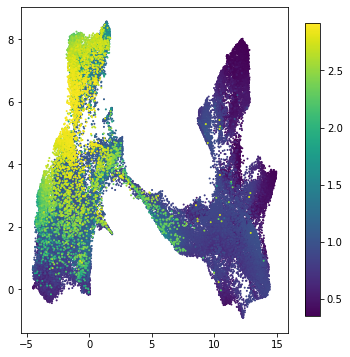

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))

c = np.exp(g)
ci = np.argsort(c)
sax = ax.scatter(xu[ci,0], xu[ci,1], s = 1, c = c[ci])

plt.colorbar(sax, shrink = 0.9)

# Train PRESCIENT model

We can now train a basic PRESCIENT model using the output `data.pt` from the `process_data` command. This command will train a model using default parameters, but more options can be found at the CLI documentation [here](https://cgs.csail.mit.edu/prescient/documentation/)

In [ ]:
!prescient train_model -i data.pt \
    --out_dir /experiments/ \
    --weight_name 'kegg-growth' \
    --gpu 0 \
    --pretrain_epochs 10 \
    --train_epochs 10

2021-02-19 18:52:30.722078: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
tcmalloc: large alloc 1122222080 bytes == 0xb3a2000 @  0x7f1c47308b6b 0x7f1c47328379 0x7f1bdd40374e 0x7f1bdd4057b6 0x7f1c1859e99d 0x7f1c27c615c8 0x7f1c278dfc1a 0x566bbc 0x50a433 0x50beb4 0x507be4 0x588e5c 0x59fd0e 0x50d256 0x507be4 0x509900 0x50a2fd 0x50beb4 0x5095c8 0x50a2fd 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50beb4 0x5095c8 0x50a2fd 0x50beb4 0x5095c8 0x50a2fd 0x50beb4
Making directory at /experiments/kegg-growth-softplus_1_500-1e-06/seed_2
AutoGenerator(
  (net): Sequential(
    (linear1): Linear(in_features=30, out_features=500, bias=True)
    (softplus1): Softplus(beta=1, threshold=20)
    (linear): Linear(in_features=500, out_features=1, bias=False)
  )
)
[seed_2|pretrain] 9 0.001: 100% 10/10 [00:01<00:00,  8.99it/s]
[seed_2|train] 10 97.534819 141.810565 108.294016 126.204787 133.153367 143.071209 150.159607 128.604053 132.489433: 10

Training on this dataset for 2500 training epochs with default parameters will take ~0.5 hours, depending on the GPU. Here, we have terminated the training early. Let's instead download a trained model that we will use for the rest of this demo. 

In [ ]:
!wget -O experiments.zip https://www.dropbox.com/sh/o4897lyxh4189v3/AAAcUXoIm7ggvTZa9JlfDctia/kegg-softplus_2_400-1e-06?dl=1

--2021-02-19 18:53:15--  https://www.dropbox.com/sh/o4897lyxh4189v3/AAAcUXoIm7ggvTZa9JlfDctia/kegg-softplus_2_400-1e-06?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.83.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.83.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/dl/o4897lyxh4189v3/AAAcUXoIm7ggvTZa9JlfDctia/kegg-softplus_2_400-1e-06 [following]
--2021-02-19 18:53:16--  https://www.dropbox.com/sh/dl/o4897lyxh4189v3/AAAcUXoIm7ggvTZa9JlfDctia/kegg-softplus_2_400-1e-06
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc25086a7d00463789ec38b2b930.dl.dropboxusercontent.com/zip_download_get/Asqo6-LDCp0lK0ITx8Vv-EGN51GWk5n0HBW-KpOQWzwR-MuMEIrMiPGkPtoI20ZQI-UCF2tSFFihMMByvjmuJj5mS_k4a6l1FgZyaHrdLQS-hg?dl=1 [following]
--2021-02-19 18:53:17--  https://uc25086a7d00463789ec38b2b930.dl.dropboxusercontent.com/zip_download_ge

In [ ]:
!unzip -q -d experiments/ experiments.zip 

mapname:  conversion of  failed


## Visualizing potential and drift

We can now visualize the potential and drift learned by the model. This section also demonstrates how to interact with the PRESCIENT data object and trained models in python. 

In [ ]:
import prescient.train
import torch

from types import SimpleNamespace

In [ ]:
device = torch.device('cuda:0')
kwargs = {'num_workers': 1, 'pin_memory': True}
torch.cuda.is_available()

True

Load model from a saved checkpoint

In [ ]:
config_path = "./experiments/seed_2/config.pt"
config = SimpleNamespace(**torch.load(config_path))

In [ ]:
model = prescient.train.AutoGenerator(config)
train_pt = "./experiments/seed_2/train.epoch_001500.pt"
checkpoint = torch.load(train_pt, map_location = device)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)
print(model)

AutoGenerator(
  (net): Sequential(
    (linear1): Linear(in_features=30, out_features=400, bias=True)
    (softplus1): Softplus(beta=1, threshold=20)
    (linear2): Linear(in_features=400, out_features=400, bias=True)
    (softplus2): Softplus(beta=1, threshold=20)
    (linear): Linear(in_features=400, out_features=1, bias=False)
  )
)


Load data

In [ ]:
veres_data = torch.load("data.pt")
x = veres_data['x']
y = veres_data['y']
w = veres_data['w']

To visualize the potential landscape learned by the model, we sample data points uniformly over the umap grid and evaluate the drift, which gives the direction of the arrow originating at each point.

In [ ]:
%%capture 
# ^suppresses output

xg = 25
yg = 25
xgrid = np.linspace(-5, 15.0, xg)
ygrid = np.linspace(-2, 10, yg)

fig, ax = plt.subplots(figsize = (6,6))

ax.scatter(xu[:,0], xu[:,1], s = 1, color = 'gray')

xus = []
xvs = []
for xi in range(xg-1): 
    for yi in range(yg-1): 
        
        xmin, xmax = xgrid[xi], xgrid[xi+1]
        ymin, ymax = ygrid[yi], ygrid[yi+1]
    
        in_x = (xu[:,0] > xmin) & (xu[:,0] < xmax)
        in_y = (xu[:,1] > ymin) & (xu[:,1] < ymax)
        in_box = in_x & in_y    
        
        if in_box.sum() > 3: 
            ix = np.random.choice(np.where(in_box)[0], max(3, int(in_box.sum() * 0.002)))

            xv = torch.from_numpy(xp.values[ix,:]).float().to(device)
            xv = xv + model._drift(xv)
            xvs.append(xv.detach().cpu().numpy())
            xus.append(xu[ix,:])
        
xvs = np.concatenate(xvs)
xus = np.concatenate(xus)
xvs = um.transform(xvs) - xus
xvs = xvs / np.linalg.norm(xvs, axis = 1)[:,np.newaxis]

ax.quiver(xus[:,0], xus[:,1], xvs[:,0], xvs[:,1], scale = 1.5, scale_units = 'xy', width = .004)

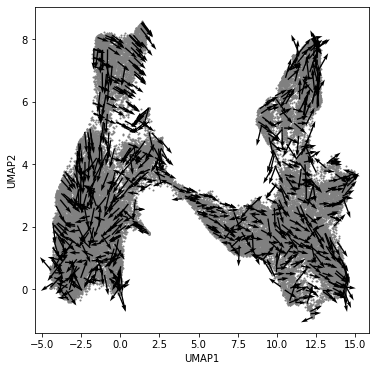

In [ ]:
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
fig

We can also visualize the potential by evaluating it at each point

Text(0, 0.5, 'UMAP2')

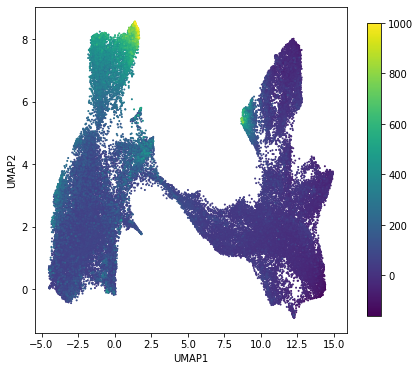

In [ ]:
fig, ax = plt.subplots(figsize = (7, 6))
xc = []

c = model._pot(torch.from_numpy(xp.values).float().to(device)).detach().cpu().numpy()[:,0] * -1
ci = np.argsort(c)

sax = ax.scatter(xu[ci,0], xu[ci,1], s = 1, c = c[ci], vmax = 1000)

plt.colorbar(sax, shrink = 0.9)
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')

# Simulate trajectories

Now that we have a trained PRESCIENT model, we can use it and the original data object to simulate trajectories of cells with arbitrary initializations using `simulate`. More options can be found at the CLI documentation [here](https://cgs.csail.mit.edu/prescient/documentation/).

Here, we will randomly sample 200 cells identified as prog_sox2 and simulate forwards.

In [ ]:
!mkdir simulations

In [ ]:
!prescient simulate_trajectories -i data.pt \
  --model_path experiments/ \
  --num_steps 80 \
  --celltype_subset prog_sox2 \
  -o simulations/ \
  --seed 2 \
  --gpu 0

2021-02-19 19:35:24.032599: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
tcmalloc: large alloc 1122222080 bytes == 0xb224000 @  0x7f541eda0b6b 0x7f541edc0379 0x7f53b4e9b74e 0x7f53b4e9d7b6 0x7f53f003699d 0x7f53ff6f95c8 0x7f53ff377c1a 0x566bbc 0x50a433 0x50beb4 0x507be4 0x588e5c 0x59fd0e 0x50d256 0x507be4 0x509900 0x50a2fd 0x50beb4 0x5095c8 0x50a2fd 0x50beb4 0x5095c8 0x50a2fd 0x50beb4 0x507be4 0x50ad03 0x634e72 0x634f27 0x6386df 0x639281 0x4b0dc0
[simulate] 9: 100% 10/10 [00:01<00:00,  7.03it/s]


This produces a file containing simulated trajectories from the randomly initialized cells 

In [ ]:
sim = torch.load("simulations/seed_2_train.epoch_002500_num.sims_10_num.cells_200_num.steps_80_subsets_None_prog_sox2_simulation.pt")["sims"]

The results contain trajectories over 10 seeds, for 200 cells x 300 PCs taking 80 time steps

In [ ]:
len(sim), sim[0].shape

(10, (81, 200, 30))

Sample 20 random cells and plot their simulated trajectories over time (color)

In [ ]:
%%capture
fig, ax = plt.subplots(figsize = (7, 6))
ax.scatter(xu[:,0], xu[:,1], s = 1, color = 'gray')

c = np.arange(sim[0].shape[0])

for i in np.random.randint(0, 200, size = 20):  
  xu_ = um.transform(sim[0][:,i,:])
  sax = ax.scatter(xu_[:,0], xu_[:,1], c = c)
  ax.plot(xu_[:,0], xu_[:,1], '-', color = 'k', linewidth = 0.2)

plt.colorbar(sax, shrink = 0.9)
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')

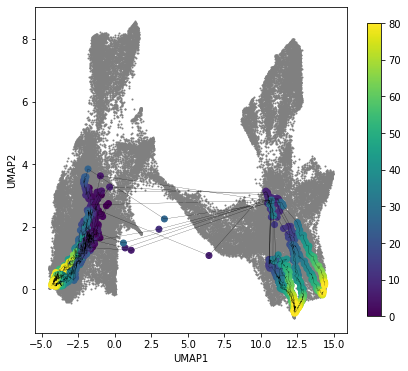

In [ ]:
fig

# Run perturbation simulations

One of the advantages of training a PRESCIENT model is the ability to simulate the trajectory of out-of-sample or perturbed initial cells. To do this, individual or sets of genes are perturbed by setting the value(s) to a z-score in scaled expression space. `perturbation_analysis` induces perturbations and generates simulated trajectories of both unperturbed and perturbed cells for comparison. More options can be found at the CLI documentation [here](https://cgs.csail.mit.edu/prescient/documentation/).

In the following example, we perturb PTF1A and HES1 in 10 random samples of 200 cells with a z-score of 5, and simulate forwards to the final timepoint with the model that we have trained. 

In [ ]:
!mkdir perturbations

In [ ]:
!prescient perturbation_analysis -i data.pt \
  -p 'PTF1A,HES1' -z 5 \
  --model_path experiments/ \
  -o perturbations/ \
  --seed 2 \
  --gpu 0

2021-02-19 19:51:01.961138: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
tcmalloc: large alloc 1122222080 bytes == 0xbada000 @  0x7fd2819e0b6b 0x7fd281a00379 0x7fd217adb74e 0x7fd217add7b6 0x7fd252c7699d 0x7fd2623395c8 0x7fd261fb7c1a 0x566bbc 0x50a433 0x50beb4 0x507be4 0x588e5c 0x59fd0e 0x50d256 0x507be4 0x509900 0x50a2fd 0x50beb4 0x5095c8 0x50a2fd 0x50beb4 0x5095c8 0x50a2fd 0x50beb4 0x507be4 0x50ad03 0x634e72 0x634f27 0x6386df 0x639281 0x4b0dc0
[simulate] 9: 100% 10/10 [00:01<00:00,  7.86it/s]
[simulate] 9: 100% 10/10 [00:01<00:00,  9.94it/s]


As with `simulate_trajectories`, this outputs a file containing the simulated trajectories of the perturbed cells. 